In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PEPit import PEP
from PEPit.functions import SmoothStronglyConvexFunction
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})
from cycler import cycler
plt.rc('axes', prop_cycle=cycler('linestyle', ['-', '--', ':', '-.']))

In [1]:
!pip install pepit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.4/355.4 kB 8.1 MB/s eta 0:00:00a 0:00:01


In [20]:
# Define pepit problem and solve for varying step sizes
L = 1.0
mu = 0.1
t_val = np.linspace(-1, 3, 100)  # step size
worst_case_theory = np.maximum((1 - t_val * mu)**2, (1 - t_val * L)**2)
worst_case_pep = []

for t in t_val:
    problem = PEP()
    func = problem.declare_function(function_class=SmoothStronglyConvexFunction, mu=mu, L=L)
    x0 = problem.set_initial_point()
    x1 = x0 - t * func.gradient(x0)
    problem.set_initial_condition(func.gradient(x0) ** 2 <= 1)
    problem.set_performance_metric(func.gradient(x1) ** 2)
    worst_case_pep.append(problem.solve(solver="CLARABEL", verbose=0))

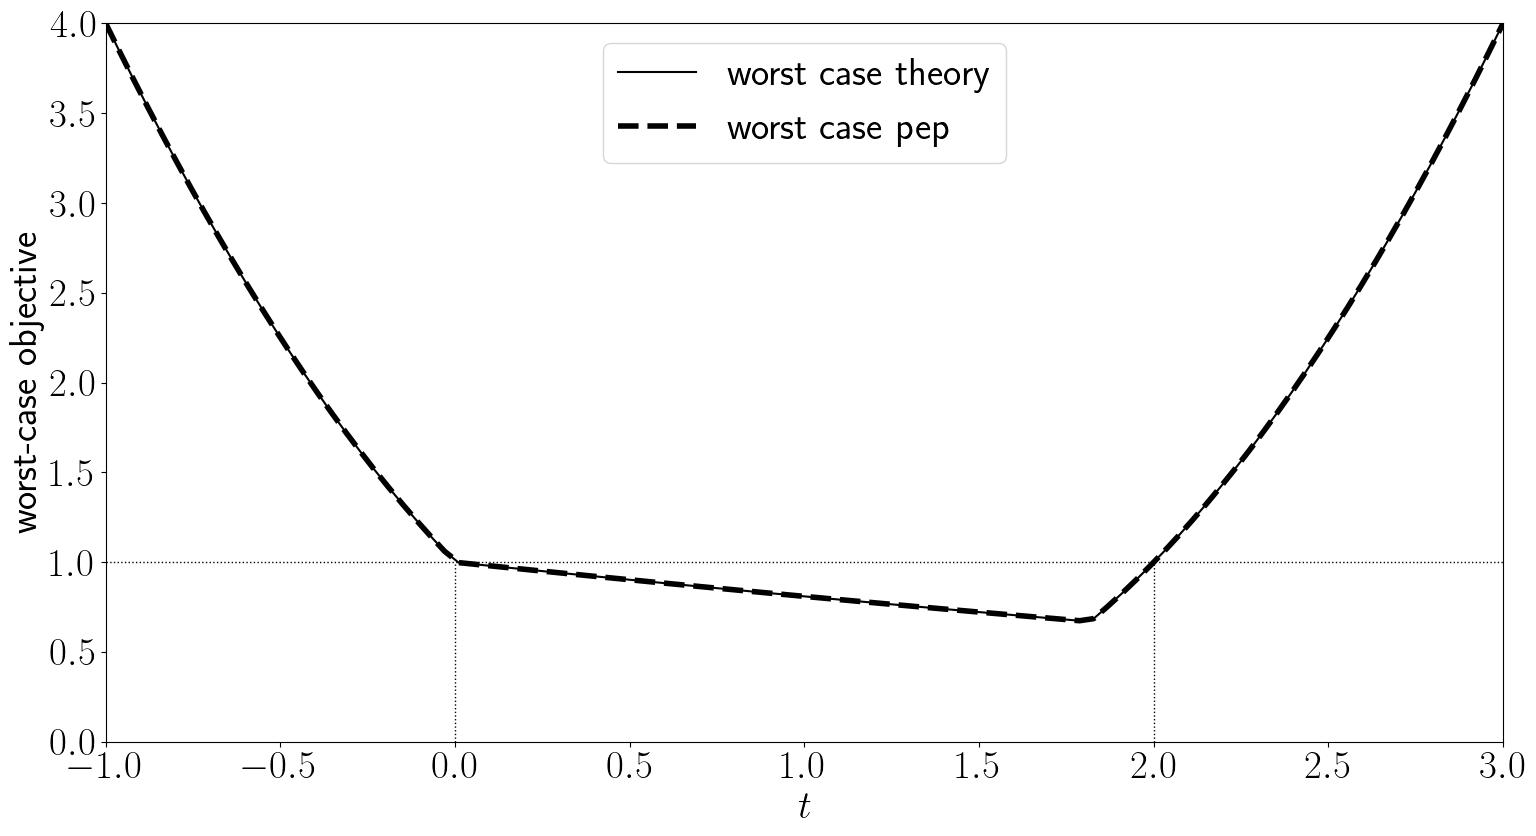

In [25]:
# Plot
fig, ax = plt.subplots(figsize=(16, 9))

# Plotting the lines with distinct styles
ax.plot(t_val, worst_case_theory, color="k",
        label=r"worst case theory", linewidth=1.5)  # Solid line
ax.plot(t_val, worst_case_pep, color="k",
        label=r"worst case pep", linestyle="dashed", linewidth=4)  # Dashed line with slight thickness

# Adding horizontal line at y = 1.0
ax.axhline(y=1.0, color="k", linestyle=":", linewidth=1)  # Dotted line for distinction

# Adding vertical lines at x = 0.0 and x = 2.0 from y = 0.0 to y = 1.0
ax.axvline(x=0.0, ymin=0, ymax=0.25, color="k", linestyle=":", linewidth=1)  # ymin/ymax in fraction of y-axis
ax.axvline(x=2.0, ymin=0, ymax=0.25, color="k", linestyle=":", linewidth=1)

ax.set_ylabel(r"worst-case objective")
ax.set_xlabel(r"$t$")
ax.set_xlim([-1, 3])
ax.set_ylim([0, 4])
ax.legend()


plt.tight_layout()
plt.savefig("gd_pep.pdf")